<a href="https://colab.research.google.com/github/Neerajmn28/Data-science-assignments/blob/main/Clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#Hierarchial clustering

In [ ]:
data=pd.read_csv('/content/crime_data.csv')

In [ ]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#EDA

In [ ]:
data1=data.rename({'Unnamed: 0':'State'},axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
data1.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<Axes: >

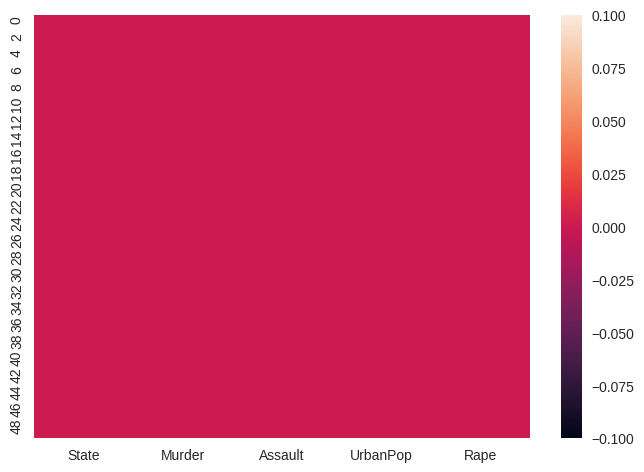

In [ ]:
sns.heatmap(data1.isnull())

In [ ]:
data1.corr()

<ipython-input-42-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


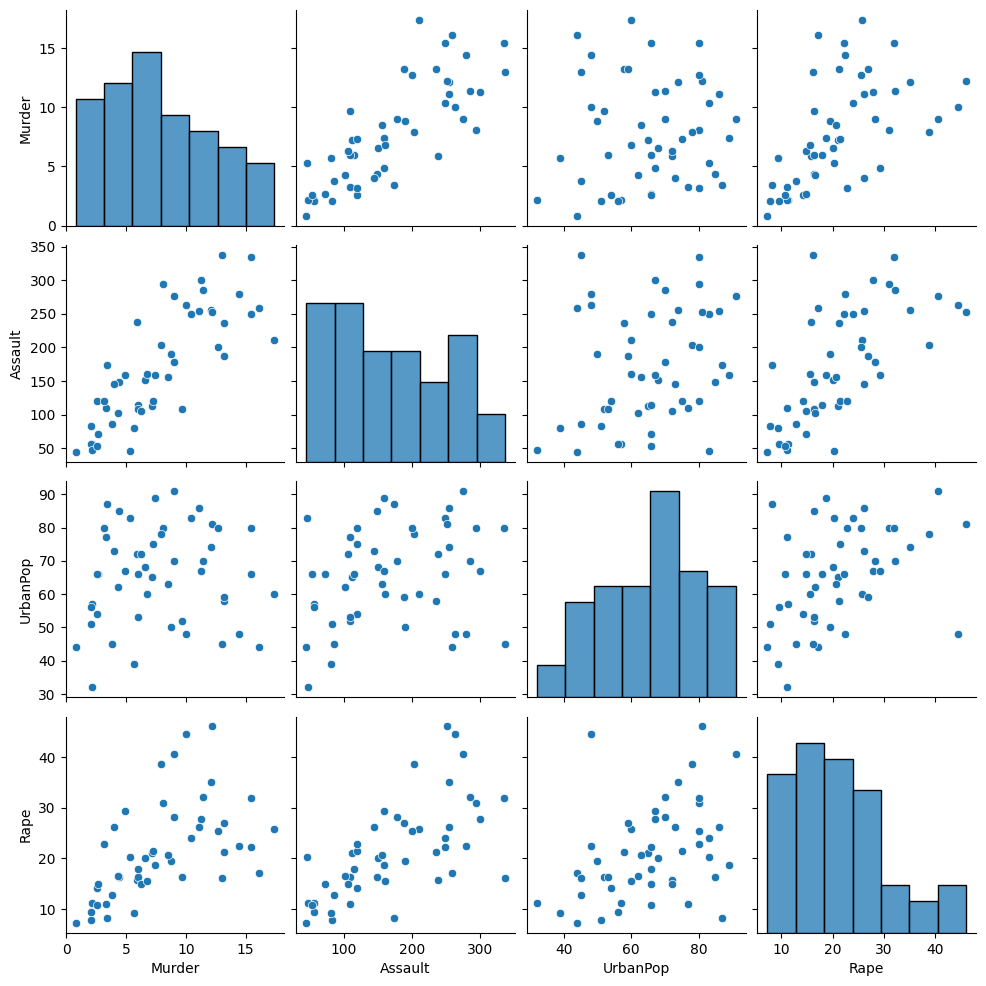

In [ ]:
sns.pairplot(data1)

<Axes: title={'center': 'Murder rate in US state wise'}, xlabel='State', ylabel='Murder'>

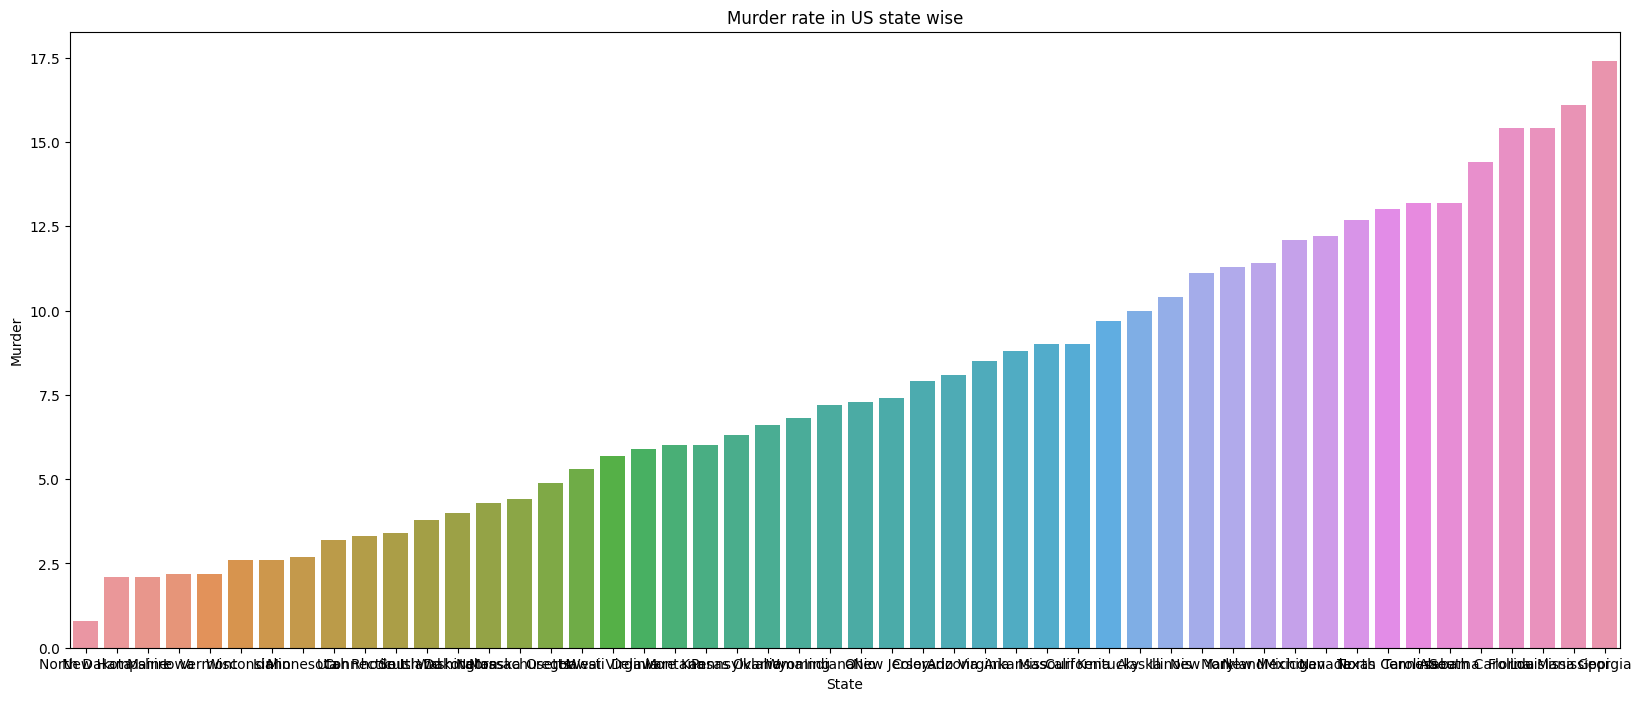

In [ ]:
#Murder rate (barplot)
plt.figure(figsize=(20,8))
plt.title('Murder rate in US state wise')
sns.barplot(x='State',y="Murder",data=data1, order=data.sort_values('Murder').State)

In [ ]:
print('Top 10 States with Lowest Murder Rate')
data.sort_values('Murder',ascending=True).head(10)

Top 10 States with Lowest Murder Rate


,State,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3
28,New Hampshire,2.1,57,56,9.5
18,Maine,2.1,83,51,7.8
14,Iowa,2.2,56,57,11.3
44,Vermont,2.2,48,32,11.2
48,Wisconsin,2.6,53,66,10.8
11,Idaho,2.6,120,54,14.2
22,Minnesota,2.7,72,66,14.9
43,Utah,3.2,120,80,22.9
6,Connecticut,3.3,110,77,11.1


In [ ]:
print('Top 10 States with high murder rate')
data.sort_values('Murder',ascending=False).head(10)

Top 10 States with high murder rate


,State,Murder,Assault,UrbanPop,Rape
9,Georgia,17.4,211,60,25.8
23,Mississippi,16.1,259,44,17.1
8,Florida,15.4,335,80,31.9
17,Louisiana,15.4,249,66,22.2
39,South Carolina,14.4,279,48,22.5
0,Alabama,13.2,236,58,21.2
41,Tennessee,13.2,188,59,26.9
32,North Carolina,13.0,337,45,16.1
42,Texas,12.7,201,80,25.5
27,Nevada,12.2,252,81,46.0


#Model Building

In [ ]:
#Normalizing Dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler_data1=scaler.fit_transform(data1.iloc[:,1:])
print(scaler_data1)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

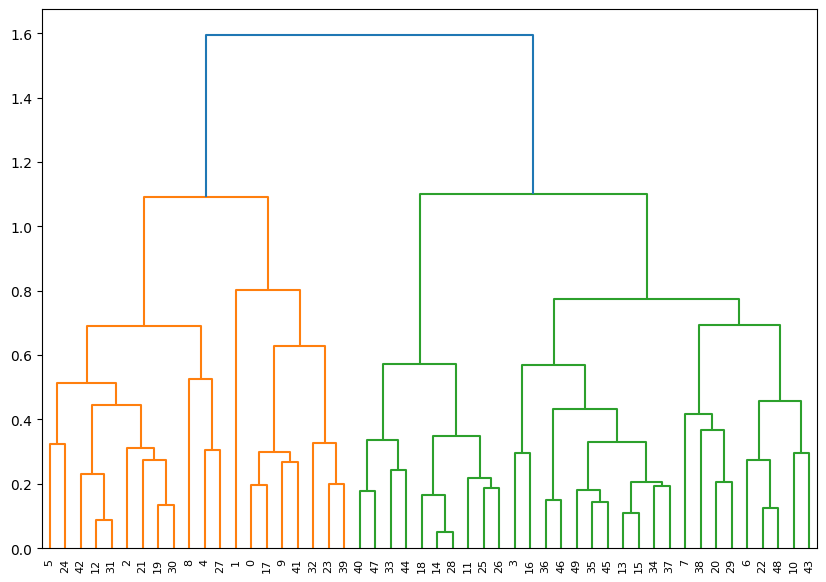

In [ ]:
#Create dendogram
plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(scaler_data1,"complete"))

In [ ]:
# Creating clusters
H_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
# Using data normalized by MinMaxscaler
y=pd.DataFrame(H_clusters.fit_predict(scaler_data1),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    18
1    13
2    12
3     7
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
data1["clustersid_HC"]=H_clusters.labels_

In [ ]:
data1

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
data1.groupby("clustersid_HC").agg(['mean']).reset_index()

,clustersid_HC,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


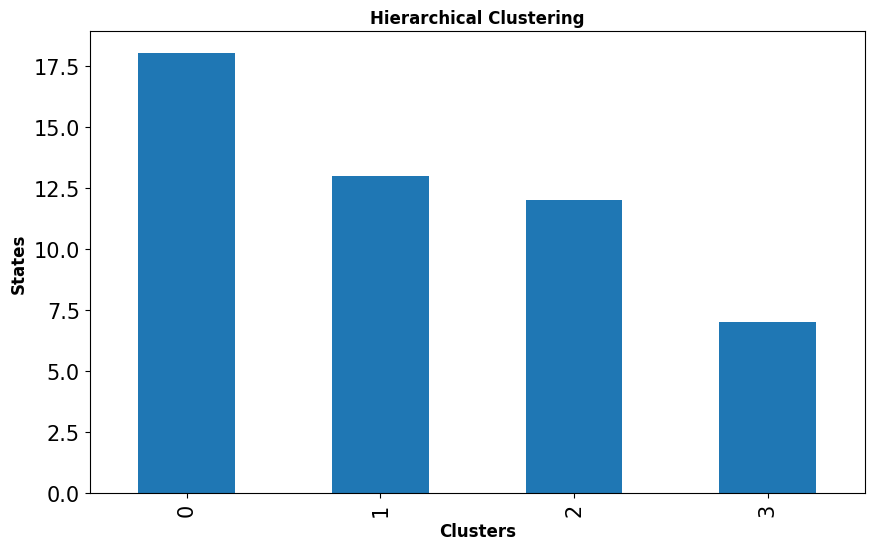

In [ ]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data1.groupby(['clustersid_HC']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

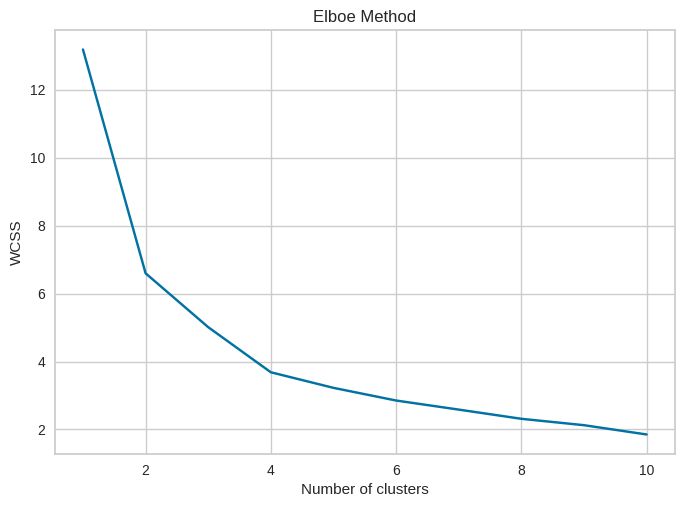

In [ ]:
# Using data normalized by MinMaxScaler
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_data1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elboe Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Model building

In [ ]:
# Build Cluster algorithm
Kclusters=KMeans(4,random_state=42)
Kclusters.fit(scaler_data1)

KMeans(n_clusters=4, random_state=42)

In [ ]:
y=pd.DataFrame(Kclusters.fit_predict(scaler_data1),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

3    17
0    13
1    12
2     8
Name: clusterid_Kmeans, dtype: int64

In [ ]:
# Assign clusters to that data set
data1['clusterid_Kmeans']=Kclusters.labels_
data1

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,2


In [ ]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape,clustersid_HC
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,1.846154
1,1,10.966667,264.000000,76.500000,33.608333,1.000000
2,2,13.937500,243.625000,53.750000,21.412500,2.625000
3,3,5.852941,141.176471,73.647059,19.335294,0.058824


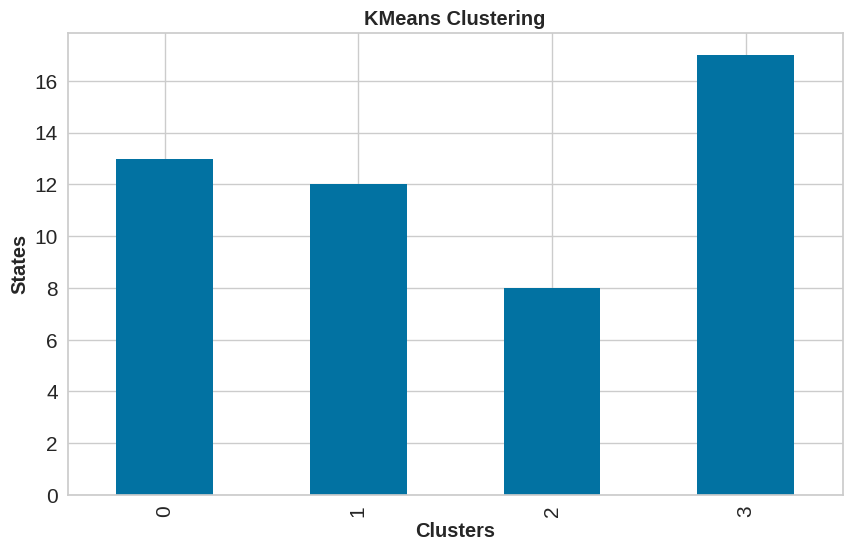

In [ ]:
# Plotting barplot using groupby method to get visualization of how states in each cluster
fig, ax = plt.subplots(figsize=(10, 6))
data1.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
data1.drop(['State'],axis=1,inplace=True)

In [ ]:
array=data1.values

In [ ]:
array

array([[ 13.2, 236. ,  58. ,  21.2,   3. ,   2. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   2. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   3. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   3. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   3. ,   2. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   3. ],
       [  2.6, 120. ,  54. ,  14.2,   2. ,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   3. ],
       [  2.2,  56. ,  57. ,  11.3,   2. ,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   3. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   3. ,   2. ],
       [  2.1,  83. ,  51. ,   7.8,   2. ,   0. ],
       [ 11.3, 300. ,  67. ,  2

In [ ]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [ ]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.72756626,
         0.34956332],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.15022315,
        -0.4827303 ],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.15022315,
        -0.4827303 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.08911786,
         0.34956332],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.15022315,
        -0.4827303 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.15022315,
        -0.4827303 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.08911786,
         1.18185693],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.08911786,
         1.18185693],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.15022315,
        -0.4827303 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.72756626,
         0.34956332],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [ ]:
dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0, -1,  1,  0,  1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        1,  1, -1,  1, -1, -1,  0, -1, -1, -1, -1,  1, -1,  0,  0,  1])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [ ]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1
